<a href="https://colab.research.google.com/github/AbdurRahmaneee/machine_learning_projects/blob/main/Multi_phaseflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Working with 1st dataset

In [ ]:
# Extacting data 
import numpy as np
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Multiphase_project/dataset_1.zip")
zip_ref.extractall()
zip_ref.close()

FileNotFoundError: ignored

In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("dataset_1"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# Create training and test directory paths
train_dir = "dataset/train"
test_dir = "dataset/test"

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                         batch_size=2)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        shuffle=False,
                                                        batch_size=2)

In [ ]:
class_names = test_data.class_names
class_names

['annular', 'plug', 'slug', 'stratified', 'wavy']

In [ ]:
len(test_data.class_names)

5

In [ ]:
len(train_data)

32

<!-- ### TensorBoard callback

1. Load the tensorboard notebook extension
2. Create a tensorboard callback which is able to save logs to a directory and pass it to our model's fit() function.
3. Visualize our models training logs with the `%tensorboard magic function` (after model training) -->

In [ ]:
# # Load tensorboard notebook extension
# %load_ext tensorboard


In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5)

In [ ]:
# import datetime

# # Create a fucntion to build a tensorboard callback
# def create_tensorboard_callback():
#   #  create a log directory for storing tensorboard

In [ ]:
# Creating data augmentation layer
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    #preprocessing.RandomCrop(244, 244, 42),
    #preprocessing.RandomHeight(0.2), 
    #preprocessing.RandomWidth(0.2), 
    preprocessing.RandomZoom(0.2),
    # preprocessing.Rescalling(1/255.)
    preprocessing.RandomContrast(0.2),
    #preprocessing.RandomTranslation(height_factor=(-0.1, +0.1), width_factor=(-0.1, +0.1), fill_mode="nearest", interpolation="nearest", seed= 42) # not cool
], name ="data_augmentation")

In [ ]:
# Function to plot loss cureves
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.

  Args:
    history: Tensorflow History object.
  
  Returns:
    Plot of training/validation loss and accuracy metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

In [ ]:
# Setup the base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
# model summary
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pool_layer (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 5)                 6405      
                                                                 
Total params: 4,055,976
Trainable params: 6,405
Non-trainab

In [ ]:
# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])


In [ ]:
# Fit
history_base_model = model.fit(train_data,
                               epochs=5,
                               validation_data=test_data,
                               validation_steps=len(test_data)
                               )

Epoch 1/5
16/16 [==============================] - 10s 317ms/step - loss: 1.7337 - accuracy: 0.1250 - val_loss: 1.4810 - val_accuracy: 0.3000
Epoch 2/5
16/16 [==============================] - 2s 122ms/step - loss: 1.6099 - accuracy: 0.0938 - val_loss: 1.3931 - val_accuracy: 0.3667
Epoch 3/5
16/16 [==============================] - 2s 118ms/step - loss: 1.4774 - accuracy: 0.4688 - val_loss: 1.4053 - val_accuracy: 0.3333
Epoch 4/5
16/16 [==============================] - 2s 117ms/step - loss: 1.4228 - accuracy: 0.4375 - val_loss: 1.3528 - val_accuracy: 0.5000
Epoch 5/5
16/16 [==============================] - 2s 117ms/step - loss: 1.4423 - accuracy: 0.4375 - val_loss: 1.4971 - val_accuracy: 0.4667


In [ ]:
len(test_data)

30

In [ ]:
len(train_data)

32

In [ ]:
model.evaluate(test_data)

30/30 [==============================] - 3s 95ms/step - loss: 1.2855 - accuracy: 0.2667


[1.285507082939148, 0.2666666805744171]

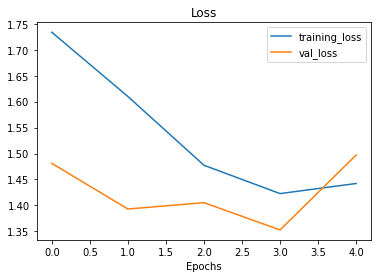

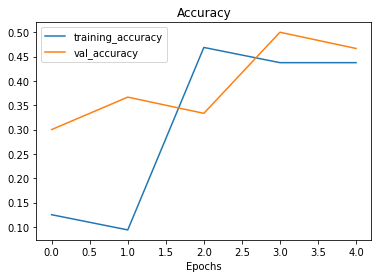

In [ ]:
plot_loss_curves(history_base_model)

In [ ]:
# Setup data augmentation for resnet
data_augmentation2 = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    #preprocessing.RandomHeight(0.2), # 56%
   # preprocessing.RandomWidth(0.2), # took it to 50&
    preprocessing.RandomZoom(0.2),
    preprocessing.Rescaling(1/255.),
    preprocessing.RandomContrast(0.2),
    # preprocessing.RandomTranslation(0.2, 0.2) # not cool
], name ="data_augmentation")

In [ ]:
# Setup the base model
base_model_2 = tf.keras.applications.ResNet101(include_top=False)
base_model_2.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation2(inputs) 
x = base_model_2(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

171458560/171446536 [==============================] - 2s 0us/step


In [ ]:
# model summary
model_2.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 resnet101 (Functional)      (None, None, None, 2048)  42658176  
                                                                 
 global_avg_pool_layer (Glob  (None, 2048)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 5)                 10245     
                                                                 
Total params: 42,668,421
Trainable params: 10,245
Non-trai

In [ ]:
# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])


In [ ]:
# Fit
history_model_2 = model_2.fit(train_data,
                               epochs=100,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                               callbacks=[early_stopping])

Epoch 1/100
16/16 [==============================] - 10s 238ms/step - loss: 1.7514 - accuracy: 0.1562 - val_loss: 1.5210 - val_accuracy: 0.3667
Epoch 2/100
16/16 [==============================] - 3s 138ms/step - loss: 1.6491 - accuracy: 0.1250 - val_loss: 1.6403 - val_accuracy: 0.0667
Epoch 3/100
16/16 [==============================] - 3s 137ms/step - loss: 1.6642 - accuracy: 0.0625 - val_loss: 1.5275 - val_accuracy: 0.1667
Epoch 4/100
16/16 [==============================] - 3s 132ms/step - loss: 1.6678 - accuracy: 0.0938 - val_loss: 1.5983 - val_accuracy: 0.0667
Epoch 5/100
16/16 [==============================] - 3s 137ms/step - loss: 1.6606 - accuracy: 0.1250 - val_loss: 1.5424 - val_accuracy: 0.2333
Epoch 6/100
16/16 [==============================] - 3s 138ms/step - loss: 1.6364 - accuracy: 0.1250 - val_loss: 1.5831 - val_accuracy: 0.2333


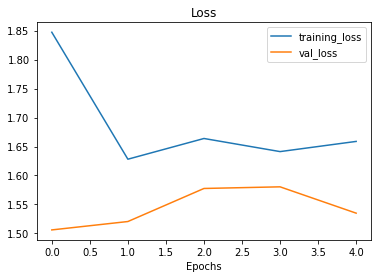

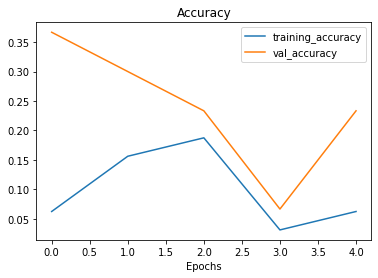

In [ ]:
plot_loss_curves(history_model_2)

In [ ]:
# Let's try out EfficientNetB1
# Setup the base model
base_model_3 = tf.keras.applications.EfficientNetB1(include_top=False)
base_model_3.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_3(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_3 = tf.keras.Model(inputs, outputs)

27033600/27018416 [==============================] - 1s 0us/step


In [ ]:
# model summary
model_3.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb1 (Functional)  (None, None, None, 1280)  6575239  
                                                                 
 global_avg_pool_layer (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 5)                 6405      
                                                                 
Total params: 6,581,644
Trainable params: 6,405
Non-traina

In [ ]:
# Compile
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Fit
history_model_3 = model_3.fit(train_data,
                               epochs=15,
                               validation_data=test_data,
                               validation_steps=len(test_data))

Epoch 1/15
16/16 [==============================] - 3s 136ms/step - loss: 1.2892 - accuracy: 0.5000 - val_loss: 1.0738 - val_accuracy: 0.5333
Epoch 2/15
16/16 [==============================] - 3s 132ms/step - loss: 1.3817 - accuracy: 0.4375 - val_loss: 1.0662 - val_accuracy: 0.5333
Epoch 3/15
16/16 [==============================] - 3s 132ms/step - loss: 1.2813 - accuracy: 0.5312 - val_loss: 1.0408 - val_accuracy: 0.5333
Epoch 4/15
16/16 [==============================] - 3s 132ms/step - loss: 1.2260 - accuracy: 0.5312 - val_loss: 1.0837 - val_accuracy: 0.5333
Epoch 5/15
16/16 [==============================] - 3s 132ms/step - loss: 1.3184 - accuracy: 0.4688 - val_loss: 1.0843 - val_accuracy: 0.5667
Epoch 6/15
16/16 [==============================] - 3s 131ms/step - loss: 1.2284 - accuracy: 0.5625 - val_loss: 1.0745 - val_accuracy: 0.5333
Epoch 7/15
16/16 [==============================] - 3s 126ms/step - loss: 1.1727 - accuracy: 0.5000 - val_loss: 1.1073 - val_accuracy: 0.5000
Epoch 

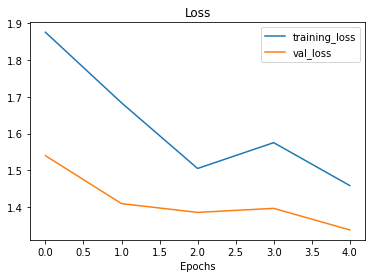

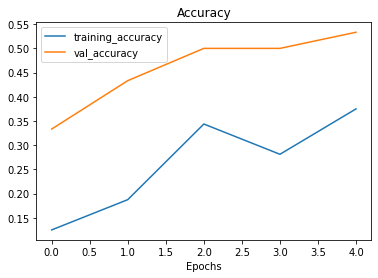

In [ ]:
plot_loss_curves(history_model_3)

In [ ]:
# Let's try ResNet101V2
# Setup the base model
base_model_4 = tf.keras.applications.ResNet101V2(include_top=False)
base_model_4.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation2(inputs) 
x = base_model_4(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_4 = tf.keras.Model(inputs, outputs)

# Compile
model_4.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_4 = model_4.fit(train_data,
                               epochs=100,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                              callbacks=[early_stopping])


171327488/171317808 [==============================] - 1s 0us/step
Epoch 1/100


ValueError: ignored

nope

In [ ]:
# Let's try EfficientNetB2
# Setup the base model
base_model_5 = tf.keras.applications.EfficientNetB2(include_top=False)
base_model_5.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_5(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_5 = tf.keras.Model(inputs, outputs)

# Compile
model_5.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_5 = model_5.fit(train_data,
                               epochs=5,
                               validation_data=test_data,
                               validation_steps=len(test_data))

Epoch 1/5
16/16 [==============================] - 12s 269ms/step - loss: 1.8086 - accuracy: 0.2188 - val_loss: 1.4721 - val_accuracy: 0.3333
Epoch 2/5
16/16 [==============================] - 2s 119ms/step - loss: 1.5623 - accuracy: 0.2812 - val_loss: 1.3402 - val_accuracy: 0.4333
Epoch 3/5
16/16 [==============================] - 2s 118ms/step - loss: 1.4764 - accuracy: 0.3750 - val_loss: 1.3353 - val_accuracy: 0.4333
Epoch 4/5
16/16 [==============================] - 2s 124ms/step - loss: 1.3722 - accuracy: 0.4375 - val_loss: 1.3429 - val_accuracy: 0.4667
Epoch 5/5
16/16 [==============================] - 2s 119ms/step - loss: 1.5471 - accuracy: 0.2500 - val_loss: 1.2907 - val_accuracy: 0.6000


Best so far

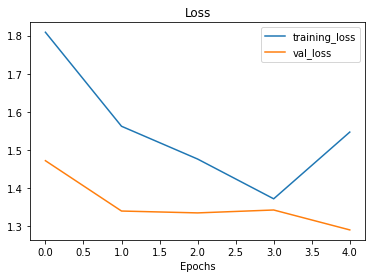

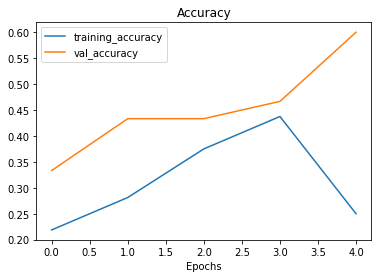

In [ ]:
plot_loss_curves(history_model_5)

In [ ]:
# Let's try ResNet152
# Setup the base model
base_model_6= tf.keras.applications.ResNet152(include_top=False)
base_model_6.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation2(inputs) 
x = base_model_6(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_6 = tf.keras.Model(inputs, outputs)

# Compile
model_6.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_6 = model_6.fit(train_data,
                               epochs=5,
                               validation_data=test_data,
                               validation_steps=len(test_data))

Epoch 1/5
16/16 [==============================] - 13s 310ms/step - loss: 1.7824 - accuracy: 0.2188 - val_loss: 1.6333 - val_accuracy: 0.3667
Epoch 2/5
16/16 [==============================] - 3s 147ms/step - loss: 1.6461 - accuracy: 0.1875 - val_loss: 1.6441 - val_accuracy: 0.2333
Epoch 3/5
16/16 [==============================] - 4s 203ms/step - loss: 1.6389 - accuracy: 0.2188 - val_loss: 1.5406 - val_accuracy: 0.3667
Epoch 4/5
16/16 [==============================] - 3s 146ms/step - loss: 1.6781 - accuracy: 0.1875 - val_loss: 1.5954 - val_accuracy: 0.2333
Epoch 5/5
16/16 [==============================] - 3s 144ms/step - loss: 1.6350 - accuracy: 0.1562 - val_loss: 1.5716 - val_accuracy: 0.3667


not so good


In [ ]:
# Let's try ResNet152V2
# Setup the base model
base_model_7= tf.keras.applications.ResNet152V2(include_top=False)
base_model_7.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation2(inputs) 
x = base_model_6(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_7 = tf.keras.Model(inputs, outputs)

# Compile
model_7.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_7 = model_7.fit(train_data,
                               epochs=5,
                               validation_data=test_data,
                               validation_steps=len(test_data))

Epoch 1/5
16/16 [==============================] - 15s 305ms/step - loss: 1.9402 - accuracy: 0.1875 - val_loss: 1.4844 - val_accuracy: 0.2333
Epoch 2/5
16/16 [==============================] - 3s 147ms/step - loss: 1.6643 - accuracy: 0.1250 - val_loss: 1.6315 - val_accuracy: 0.0667
Epoch 3/5
16/16 [==============================] - 3s 148ms/step - loss: 1.6672 - accuracy: 0.1562 - val_loss: 1.5006 - val_accuracy: 0.3667
Epoch 4/5
16/16 [==============================] - 3s 142ms/step - loss: 1.6818 - accuracy: 0.2188 - val_loss: 1.5851 - val_accuracy: 0.2667
Epoch 5/5
16/16 [==============================] - 3s 141ms/step - loss: 1.6515 - accuracy: 0.1250 - val_loss: 1.5272 - val_accuracy: 0.3667


nope

In [ ]:
# Let's try EfficientNetB7
# Setup the base model
base_model_8= tf.keras.applications.EfficientNetB7(include_top=False)
base_model_8.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_8(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_8 = tf.keras.Model(inputs, outputs)

# Compile
model_8.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_8 = model_8.fit(train_data,
                               epochs=5,
                               validation_data=test_data,
                               validation_steps=len(test_data))

258088960/258076736 [==============================] - 1s 0us/step
Epoch 1/5
16/16 [==============================] - 25s 436ms/step - loss: 1.8857 - accuracy: 0.1250 - val_loss: 1.6107 - val_accuracy: 0.3333
Epoch 2/5
16/16 [==============================] - 3s 164ms/step - loss: 1.5626 - accuracy: 0.3125 - val_loss: 1.5381 - val_accuracy: 0.4333
Epoch 3/5
16/16 [==============================] - 4s 212ms/step - loss: 1.6176 - accuracy: 0.2500 - val_loss: 1.4456 - val_accuracy: 0.4000
Epoch 4/5
16/16 [==============================] - 3s 162ms/step - loss: 1.4614 - accuracy: 0.3125 - val_loss: 1.4147 - val_accuracy: 0.4667
Epoch 5/5
16/16 [==============================] - 3s 160ms/step - loss: 1.4799 - accuracy: 0.3125 - val_loss: 1.3439 - val_accuracy: 0.3667


ok

In [ ]:
# Let's try EfficientNetV2B0
# Setup the base model
base_model_9= tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model_9.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_9(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_9 = tf.keras.Model(inputs, outputs)

# Compile
model_9.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_9 = model_9.fit(train_data,
                               epochs=5,
                               validation_data=test_data,
                               validation_steps=len(test_data))

Epoch 1/5
16/16 [==============================] - 10s 229ms/step - loss: 1.7088 - accuracy: 0.2188 - val_loss: 1.7093 - val_accuracy: 0.3000
Epoch 2/5
16/16 [==============================] - 2s 119ms/step - loss: 1.6386 - accuracy: 0.2812 - val_loss: 1.6335 - val_accuracy: 0.3000
Epoch 3/5
16/16 [==============================] - 2s 115ms/step - loss: 1.5811 - accuracy: 0.1875 - val_loss: 1.5897 - val_accuracy: 0.3000
Epoch 4/5
16/16 [==============================] - 3s 121ms/step - loss: 1.5912 - accuracy: 0.2500 - val_loss: 1.5535 - val_accuracy: 0.3000
Epoch 5/5
16/16 [==============================] - 2s 117ms/step - loss: 1.4400 - accuracy: 0.4375 - val_loss: 1.5225 - val_accuracy: 0.3000


not good

In [ ]:
IMG_SIZE2 = (299, 299)
train_data2 = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         label_mode="categorical",
                                                        image_size=IMG_SIZE2,
                                                         batch_size=2)
test_data2 = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE2,
                                                        shuffle=False,
                                                        batch_size=32)

Found 32 files belonging to 5 classes.
Found 30 files belonging to 5 classes.


In [ ]:
# Let's try InceptionResNetV2
# Setup the base model
base_model_10= tf.keras.applications.InceptionResNetV2(include_top=False)
base_model_10.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(299, 299, 3), name="input_layer")
x = data_augmentation2(inputs) 
x = base_model_10(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_10 = tf.keras.Model(inputs, outputs)

# Compile
model_10.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_10 = model_10.fit(train_data2,
                               epochs=5,
                               validation_data=test_data2,
                               validation_steps=len(test_data2))

Epoch 1/5
16/16 [==============================] - 50s 2s/step - loss: 2.1939 - accuracy: 0.1562 - val_loss: 1.5480 - val_accuracy: 0.3667
Epoch 2/5
16/16 [==============================] - 33s 2s/step - loss: 1.7537 - accuracy: 0.2812 - val_loss: 1.5716 - val_accuracy: 0.2333
Epoch 3/5
16/16 [==============================] - 46s 3s/step - loss: 1.7507 - accuracy: 0.2500 - val_loss: 1.6420 - val_accuracy: 0.2667
Epoch 4/5
16/16 [==============================] - 34s 2s/step - loss: 1.7049 - accuracy: 0.2500 - val_loss: 1.4205 - val_accuracy: 0.4333
Epoch 5/5
16/16 [==============================] - 34s 2s/step - loss: 1.6059 - accuracy: 0.2500 - val_loss: 1.6184 - val_accuracy: 0.3333


In [ ]:
base_model_10.layers

In [ ]:
base_model.layers

In [ ]:
base_model_2.layers

In [ ]:
# Let's try EfficientNetB2
# Setup the base model
base_model_5 = tf.keras.applications.EfficientNetB2(include_top=False)
base_model_5.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_5(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_5 = tf.keras.Model(inputs, outputs)

# Compile
model_5.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_5 = model_5.fit(train_data,
                               epochs=15,
                               validation_data=test_data,
                               validation_steps=len(test_data))

Epoch 1/15
16/16 [==============================] - 12s 245ms/step - loss: 1.7329 - accuracy: 0.1875 - val_loss: 1.3036 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 3s 129ms/step - loss: 1.5897 - accuracy: 0.4688 - val_loss: 1.2934 - val_accuracy: 0.6000
Epoch 3/15
16/16 [==============================] - 3s 129ms/step - loss: 1.5150 - accuracy: 0.3125 - val_loss: 1.2287 - val_accuracy: 0.6333
Epoch 4/15
16/16 [==============================] - 3s 135ms/step - loss: 1.4861 - accuracy: 0.4688 - val_loss: 1.2447 - val_accuracy: 0.5333
Epoch 5/15
16/16 [==============================] - 4s 167ms/step - loss: 1.3673 - accuracy: 0.4375 - val_loss: 1.2099 - val_accuracy: 0.5333
Epoch 6/15
16/16 [==============================] - 3s 133ms/step - loss: 1.4239 - accuracy: 0.5312 - val_loss: 1.1980 - val_accuracy: 0.6333
Epoch 7/15
16/16 [==============================] - 3s 126ms/step - loss: 1.3083 - accuracy: 0.4375 - val_loss: 1.1550 - val_accuracy: 0.6000
Epoch

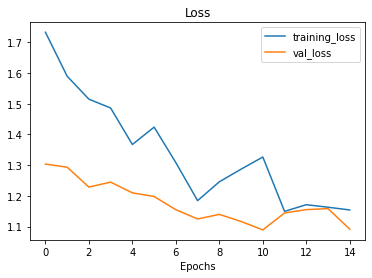

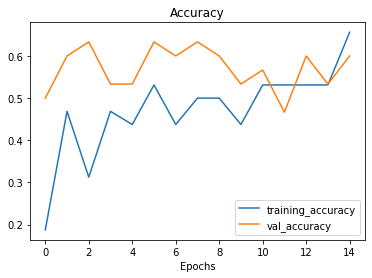

In [ ]:
plot_loss_curves(history_model_5)

In [ ]:
# Let's try EfficientNetB2
# Setup the base model
base_model_11 = tf.keras.applications.EfficientNetB2(include_top=False)
base_model_11.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_11(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_11 = tf.keras.Model(inputs, outputs)

# Compile
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_11 = model_11.fit(train_data,
                               epochs=100,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                                 callbacks=[early_stopping])

Epoch 1/100
16/16 [==============================] - 19s 616ms/step - loss: 1.7601 - accuracy: 0.1875 - val_loss: 1.5603 - val_accuracy: 0.2667
Epoch 2/100
16/16 [==============================] - 8s 459ms/step - loss: 1.4016 - accuracy: 0.3438 - val_loss: 1.5099 - val_accuracy: 0.4000
Epoch 3/100
16/16 [==============================] - 9s 498ms/step - loss: 1.5550 - accuracy: 0.2500 - val_loss: 1.5655 - val_accuracy: 0.4667
Epoch 4/100
16/16 [==============================] - 10s 567ms/step - loss: 1.4528 - accuracy: 0.4375 - val_loss: 1.5111 - val_accuracy: 0.5000
Epoch 5/100
16/16 [==============================] - 9s 541ms/step - loss: 1.4137 - accuracy: 0.4688 - val_loss: 1.4373 - val_accuracy: 0.5000
Epoch 6/100
16/16 [==============================] - 11s 644ms/step - loss: 1.3629 - accuracy: 0.3438 - val_loss: 1.3548 - val_accuracy: 0.5333
Epoch 7/100
16/16 [==============================] - 8s 456ms/step - loss: 1.2125 - accuracy: 0.6562 - val_loss: 1.3116 - val_accuracy: 0.5

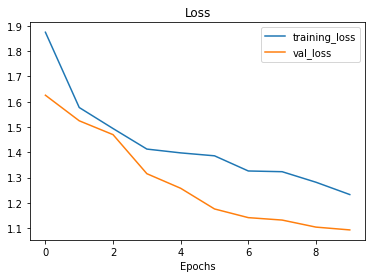

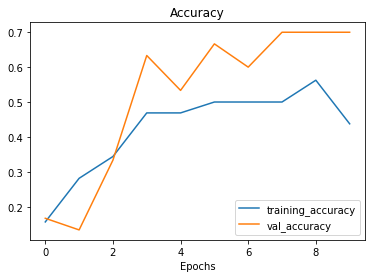

In [ ]:
plot_loss_curves(history_model_11)

In [ ]:
# Let's try EfficientNetB3
# Setup the base model
base_model_12 = tf.keras.applications.EfficientNetB3(include_top=False)
base_model_12.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_12(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_12 = tf.keras.Model(inputs, outputs)

# Compile
model_12.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_12 = model_12.fit(train_data,
                               epochs=10,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                                callbacks=[early_stopping])

Epoch 1/10
16/16 [==============================] - 12s 256ms/step - loss: 1.8394 - accuracy: 0.0938 - val_loss: 1.4935 - val_accuracy: 0.3667
Epoch 2/10
16/16 [==============================] - 3s 130ms/step - loss: 1.6523 - accuracy: 0.2812 - val_loss: 1.5294 - val_accuracy: 0.4333
Epoch 3/10
16/16 [==============================] - 3s 129ms/step - loss: 1.5615 - accuracy: 0.2500 - val_loss: 1.4747 - val_accuracy: 0.4667
Epoch 4/10
16/16 [==============================] - 3s 133ms/step - loss: 1.3795 - accuracy: 0.4375 - val_loss: 1.4492 - val_accuracy: 0.3667
Epoch 5/10
16/16 [==============================] - 3s 136ms/step - loss: 1.2887 - accuracy: 0.5312 - val_loss: 1.3968 - val_accuracy: 0.3667
Epoch 6/10
16/16 [==============================] - 3s 133ms/step - loss: 1.4188 - accuracy: 0.4688 - val_loss: 1.2739 - val_accuracy: 0.4667
Epoch 7/10
16/16 [==============================] - 3s 131ms/step - loss: 1.2930 - accuracy: 0.5312 - val_loss: 1.2508 - val_accuracy: 0.5000
Epoch

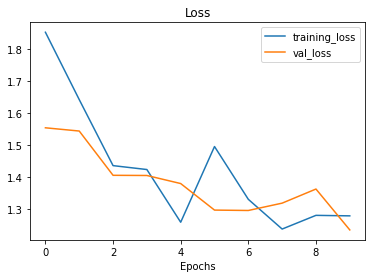

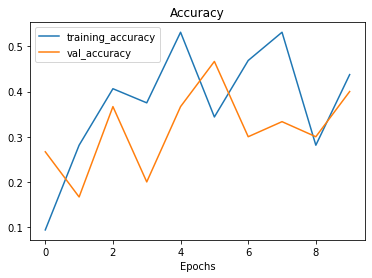

In [ ]:
plot_loss_curves(history_model_12)

ok

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE_3 = (224, 224)
train_data_3 = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         label_mode="categorical",
                                                        image_size=IMG_SIZE_3,
                                                         batch_size=2)
test_data_3 = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE_3,
                                                        shuffle=False,
                                                        batch_size=2)

Found 32 files belonging to 5 classes.
Found 30 files belonging to 5 classes.


In [ ]:
# Let's try EfficientNetB2
# Setup the base model
base_model_13 = tf.keras.applications.EfficientNetB2(include_top=False)
base_model_13.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_13(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_13 = tf.keras.Model(inputs, outputs)

# Compile
model_13.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_13 = model_13.fit(train_data_3,
                               epochs=100,
                               validation_data=test_data_3,
                               validation_steps=len(test_data_3),
                               callbacks=[early_stopping])

Epoch 1/100


16/16 [==============================] - 13s 256ms/step - loss: 1.8519 - accuracy: 0.2188 - val_loss: 1.4327 - val_accuracy: 0.5000
Epoch 2/100
16/16 [==============================] - 3s 136ms/step - loss: 1.6572 - accuracy: 0.2812 - val_loss: 1.3989 - val_accuracy: 0.4667
Epoch 3/100
16/16 [==============================] - 3s 135ms/step - loss: 1.6095 - accuracy: 0.3125 - val_loss: 1.4151 - val_accuracy: 0.4667
Epoch 4/100
16/16 [==============================] - 3s 136ms/step - loss: 1.4565 - accuracy: 0.3750 - val_loss: 1.3960 - val_accuracy: 0.4667
Epoch 5/100
16/16 [==============================] - 3s 138ms/step - loss: 1.4228 - accuracy: 0.4375 - val_loss: 1.3703 - val_accuracy: 0.5000
Epoch 6/100
16/16 [==============================] - 3s 137ms/step - loss: 1.3758 - accuracy: 0.4062 - val_loss: 1.4329 - val_accuracy: 0.4667


selected to go forward with for now

In [ ]:
# Let's try EfficientNetB4
# Setup the base model
base_model_14 = tf.keras.applications.EfficientNetB4(include_top=False)
base_model_14.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_14(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_14 = tf.keras.Model(inputs, outputs)

# Compile
model_14.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_14 = model_14.fit(train_data,
                               epochs=100,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                               callbacks=[early_stopping])

Epoch 1/100
16/16 [==============================] - 15s 290ms/step - loss: 1.8265 - accuracy: 0.0938 - val_loss: 1.5031 - val_accuracy: 0.3667
Epoch 2/100
16/16 [==============================] - 3s 135ms/step - loss: 1.7066 - accuracy: 0.2500 - val_loss: 1.4790 - val_accuracy: 0.2667
Epoch 3/100
16/16 [==============================] - 3s 140ms/step - loss: 1.5253 - accuracy: 0.3438 - val_loss: 1.4569 - val_accuracy: 0.2667
Epoch 4/100
16/16 [==============================] - 3s 144ms/step - loss: 1.5051 - accuracy: 0.3438 - val_loss: 1.4033 - val_accuracy: 0.3667
Epoch 5/100
16/16 [==============================] - 3s 135ms/step - loss: 1.5109 - accuracy: 0.3125 - val_loss: 1.3910 - val_accuracy: 0.5000
Epoch 6/100
16/16 [==============================] - 3s 141ms/step - loss: 1.3772 - accuracy: 0.5312 - val_loss: 1.3517 - val_accuracy: 0.5333
Epoch 7/100
16/16 [==============================] - 3s 138ms/step - loss: 1.3654 - accuracy: 0.4062 - val_loss: 1.3398 - val_accuracy: 0.466

In [ ]:
# Let's try EfficientNetB5
# Setup the base model
base_model_15 = tf.keras.applications.EfficientNetB5(include_top=False)
base_model_15.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_15(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_15= tf.keras.Model(inputs, outputs)

# Compile
model_15.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_15 = model_15.fit(train_data,
                               epochs=100,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                               callbacks=[early_stopping])

Epoch 1/100
16/16 [==============================] - 21s 354ms/step - loss: 1.9093 - accuracy: 0.1562 - val_loss: 1.4112 - val_accuracy: 0.3333
Epoch 2/100
16/16 [==============================] - 3s 140ms/step - loss: 1.5911 - accuracy: 0.3438 - val_loss: 1.4689 - val_accuracy: 0.4667
Epoch 3/100
16/16 [==============================] - 3s 146ms/step - loss: 1.6099 - accuracy: 0.2500 - val_loss: 1.4712 - val_accuracy: 0.3000
Epoch 4/100
16/16 [==============================] - 3s 143ms/step - loss: 1.6164 - accuracy: 0.2188 - val_loss: 1.4447 - val_accuracy: 0.3333
Epoch 5/100
16/16 [==============================] - 3s 145ms/step - loss: 1.2899 - accuracy: 0.5000 - val_loss: 1.3072 - val_accuracy: 0.5667
Epoch 6/100
16/16 [==============================] - 3s 146ms/step - loss: 1.3849 - accuracy: 0.5000 - val_loss: 1.2706 - val_accuracy: 0.5000
Epoch 7/100
16/16 [==============================] - 3s 141ms/step - loss: 1.5543 - accuracy: 0.3750 - val_loss: 1.3037 - val_accuracy: 0.333

better than B2

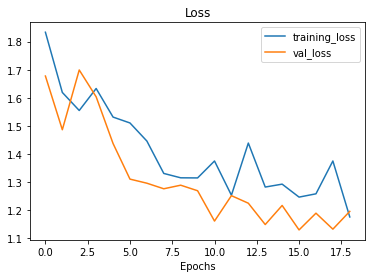

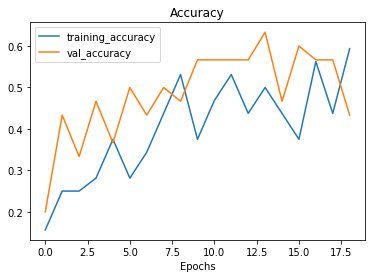

In [ ]:
plot_loss_curves(history_model_15)

In [ ]:
# Let's try EfficientNetB6
# Setup the base model
base_model_16 = tf.keras.applications.EfficientNetB6(include_top=False)
base_model_16.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_16(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_16= tf.keras.Model(inputs, outputs)

# Compile
model_16.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_16 = model_16.fit(train_data,
                               epochs=100,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                               callbacks=[early_stopping])

Epoch 1/100
16/16 [==============================] - 21s 453ms/step - loss: 1.7520 - accuracy: 0.1875 - val_loss: 1.5972 - val_accuracy: 0.2667
Epoch 2/100
16/16 [==============================] - 3s 178ms/step - loss: 1.6647 - accuracy: 0.2188 - val_loss: 1.5949 - val_accuracy: 0.1000
Epoch 3/100
16/16 [==============================] - 3s 185ms/step - loss: 1.6164 - accuracy: 0.2188 - val_loss: 1.7344 - val_accuracy: 0.2667
Epoch 4/100
16/16 [==============================] - 4s 156ms/step - loss: 1.5758 - accuracy: 0.2188 - val_loss: 1.5958 - val_accuracy: 0.4333
Epoch 5/100
16/16 [==============================] - 5s 253ms/step - loss: 1.5128 - accuracy: 0.4062 - val_loss: 1.6339 - val_accuracy: 0.4000
Epoch 6/100
16/16 [==============================] - 4s 219ms/step - loss: 1.5357 - accuracy: 0.3125 - val_loss: 1.5793 - val_accuracy: 0.4000
Epoch 7/100
16/16 [==============================] - 3s 149ms/step - loss: 1.4657 - accuracy: 0.3750 - val_loss: 1.6056 - val_accuracy: 0.500

In [ ]:
# Let's try EfficientNetB7
# Setup the base model
base_model_17 = tf.keras.applications.EfficientNetB7(include_top=False)
base_model_17.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_17(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_17= tf.keras.Model(inputs, outputs)

# Compile
model_17.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_17 = model_17.fit(train_data,
                               epochs=100,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                               callbacks=[early_stopping])

Epoch 1/100
16/16 [==============================] - 30s 552ms/step - loss: 1.7732 - accuracy: 0.1562 - val_loss: 1.4850 - val_accuracy: 0.3000
Epoch 2/100
16/16 [==============================] - 3s 165ms/step - loss: 1.6661 - accuracy: 0.2500 - val_loss: 1.4757 - val_accuracy: 0.3000
Epoch 3/100
16/16 [==============================] - 3s 160ms/step - loss: 1.5987 - accuracy: 0.2812 - val_loss: 1.3148 - val_accuracy: 0.5000
Epoch 4/100
16/16 [==============================] - 3s 156ms/step - loss: 1.6541 - accuracy: 0.1562 - val_loss: 1.3440 - val_accuracy: 0.3667
Epoch 5/100
16/16 [==============================] - 3s 155ms/step - loss: 1.3910 - accuracy: 0.4062 - val_loss: 1.2044 - val_accuracy: 0.6000
Epoch 6/100
16/16 [==============================] - 3s 158ms/step - loss: 1.4176 - accuracy: 0.3750 - val_loss: 1.2399 - val_accuracy: 0.3667
Epoch 7/100
16/16 [==============================] - 3s 161ms/step - loss: 1.4583 - accuracy: 0.3438 - val_loss: 1.2183 - val_accuracy: 0.500

In [ ]:
# Let's try EfficientNetV2B0
# Setup the base model
base_model_18 = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model_18.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_18(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_18= tf.keras.Model(inputs, outputs)

# Compile
model_18.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_18 = model_18.fit(train_data,
                               epochs=100,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                               callbacks=[early_stopping])

24289280/24274472 [==============================] - 0s 0us/step
Epoch 1/100
16/16 [==============================] - 12s 228ms/step - loss: 1.8303 - accuracy: 0.1875 - val_loss: 1.4099 - val_accuracy: 0.5000
Epoch 2/100
16/16 [==============================] - 5s 243ms/step - loss: 1.5880 - accuracy: 0.2188 - val_loss: 1.3312 - val_accuracy: 0.5667
Epoch 3/100
16/16 [==============================] - 3s 127ms/step - loss: 1.5939 - accuracy: 0.4375 - val_loss: 1.3130 - val_accuracy: 0.5000
Epoch 4/100
16/16 [==============================] - 3s 143ms/step - loss: 1.5825 - accuracy: 0.3125 - val_loss: 1.2968 - val_accuracy: 0.5667
Epoch 5/100
16/16 [==============================] - 3s 165ms/step - loss: 1.5126 - accuracy: 0.3438 - val_loss: 1.2741 - val_accuracy: 0.4333
Epoch 6/100
16/16 [==============================] - 3s 166ms/step - loss: 1.4599 - accuracy: 0.4062 - val_loss: 1.3773 - val_accuracy: 0.5333
Epoch 7/100
16/16 [==============================] - 3s 140ms/step - loss: 1

In [ ]:
# Let's try EfficientNetV2B2
# Setup the base model
base_model_19 = tf.keras.applications.EfficientNetV2B2(include_top=False)
base_model_19.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_19(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_19= tf.keras.Model(inputs, outputs)

# Compile
model_19.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_19 = model_19.fit(train_data,
                               epochs=100,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                               callbacks=[early_stopping])

Epoch 1/100
16/16 [==============================] - 11s 242ms/step - loss: 1.7352 - accuracy: 0.2188 - val_loss: 1.4910 - val_accuracy: 0.4000
Epoch 2/100
16/16 [==============================] - 3s 129ms/step - loss: 1.5872 - accuracy: 0.2500 - val_loss: 1.4509 - val_accuracy: 0.3000
Epoch 3/100
16/16 [==============================] - 3s 125ms/step - loss: 1.5762 - accuracy: 0.2500 - val_loss: 1.4424 - val_accuracy: 0.5000
Epoch 4/100
16/16 [==============================] - 3s 128ms/step - loss: 1.4869 - accuracy: 0.3438 - val_loss: 1.4873 - val_accuracy: 0.3333
Epoch 5/100
16/16 [==============================] - 3s 125ms/step - loss: 1.3423 - accuracy: 0.5000 - val_loss: 1.3813 - val_accuracy: 0.3333
Epoch 6/100
16/16 [==============================] - 3s 127ms/step - loss: 1.4389 - accuracy: 0.2812 - val_loss: 1.3221 - val_accuracy: 0.3000
Epoch 7/100
16/16 [==============================] - 3s 123ms/step - loss: 1.4974 - accuracy: 0.3750 - val_loss: 1.3992 - val_accuracy: 0.300

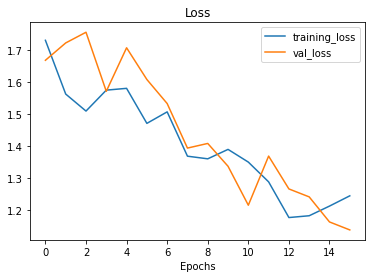

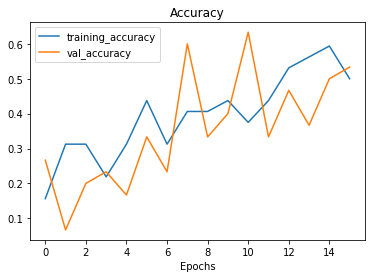

In [ ]:
plot_loss_curves(history_model_19)

In [ ]:
# Let's try EfficientNetBV2B0
# Setup the base model
base_model_20 = tf.keras.applications.EfficientNetV2S(include_top=False)
base_model_20.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_20(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_20 = tf.keras.Model(inputs, outputs)

# Compile
model_20.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_20 = model_20.fit(train_data,
                               epochs=100,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                               callbacks=[early_stopping])

82436096/82420632 [==============================] - 2s 0us/step
Epoch 1/100
16/16 [==============================] - 22s 363ms/step - loss: 1.8107 - accuracy: 0.1875 - val_loss: 1.6124 - val_accuracy: 0.3667
Epoch 2/100
16/16 [==============================] - 5s 249ms/step - loss: 1.6589 - accuracy: 0.3125 - val_loss: 1.6432 - val_accuracy: 0.2667
Epoch 3/100
16/16 [==============================] - 3s 139ms/step - loss: 1.6698 - accuracy: 0.1875 - val_loss: 1.5936 - val_accuracy: 0.2333
Epoch 4/100
16/16 [==============================] - 3s 141ms/step - loss: 1.6189 - accuracy: 0.3438 - val_loss: 1.5413 - val_accuracy: 0.5000
Epoch 5/100
16/16 [==============================] - 3s 134ms/step - loss: 1.4991 - accuracy: 0.3125 - val_loss: 1.5525 - val_accuracy: 0.4667
Epoch 6/100
16/16 [==============================] - 3s 136ms/step - loss: 1.4966 - accuracy: 0.4375 - val_loss: 1.4858 - val_accuracy: 0.4667
Epoch 7/100
16/16 [==============================] - 3s 136ms/step - loss: 1

In [ ]:
# Let's try EfficientNetBV2M
# Setup the base model
base_model_21 = tf.keras.applications.EfficientNetV2M(include_top=False)
base_model_21.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_21(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_21 = tf.keras.Model(inputs, outputs)

# Compile
model_21.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_21 = model_21.fit(train_data,
                               epochs=100,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                               callbacks=[early_stopping])

214212608/214201816 [==============================] - 3s 0us/step
Epoch 1/100
16/16 [==============================] - 23s 387ms/step - loss: 1.8006 - accuracy: 0.1562 - val_loss: 1.6851 - val_accuracy: 0.1000
Epoch 2/100
16/16 [==============================] - 3s 170ms/step - loss: 1.5448 - accuracy: 0.2812 - val_loss: 1.5974 - val_accuracy: 0.3000
Epoch 3/100
16/16 [==============================] - 3s 157ms/step - loss: 1.5581 - accuracy: 0.3438 - val_loss: 1.5122 - val_accuracy: 0.3333
Epoch 4/100
16/16 [==============================] - 3s 149ms/step - loss: 1.5200 - accuracy: 0.3125 - val_loss: 1.5482 - val_accuracy: 0.4667
Epoch 5/100
16/16 [==============================] - 3s 151ms/step - loss: 1.5782 - accuracy: 0.2500 - val_loss: 1.4936 - val_accuracy: 0.4667
Epoch 6/100
16/16 [==============================] - 3s 148ms/step - loss: 1.5388 - accuracy: 0.3438 - val_loss: 1.4393 - val_accuracy: 0.4667
Epoch 7/100
16/16 [==============================] - 3s 150ms/step - loss:

In [ ]:
# Let's try EfficientNetBV2M
# Setup the base model
base_model_21 = tf.keras.applications.EfficientNetB2(include_top=False)
base_model_21.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_21(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_21 = tf.keras.Model(inputs, outputs)

# Compile
model_21.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_21 = model_21.fit(train_data,
                               epochs=100,
                               validation_data=test_data,
                               validation_steps=len(test_data),
                               callbacks=[early_stopping])

NameError: ignored

In [ ]:
# Create a confusion metrics

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):


  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)


  # Set labels to be claseses
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
# Making predictions with our best model so far
y_probs = model_13.predict(test_data_3)

# View the first predcitons
y_probs[:5]

array([[0.45193326, 0.02637339, 0.23705901, 0.07305195, 0.21158236],
       [0.44107455, 0.02100682, 0.3291979 , 0.05538219, 0.15333857],
       [0.401341  , 0.02768664, 0.3127657 , 0.07079381, 0.18741284],
       [0.51122373, 0.01655554, 0.2772519 , 0.06432562, 0.13064322],
       [0.37590486, 0.03001668, 0.28740022, 0.08821023, 0.21846795]],
      dtype=float32)

In [ ]:
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
model_13.evaluate(test_data)


15/15 [==============================] - 4s 231ms/step - loss: 1.1926 - accuracy: 0.6000


[1.1926295757293701, 0.6000000238418579]

In [ ]:
y_preds = y_probs.argmax(axis=1)

In [ ]:
y_preds

array([0, 2, 0, 0, 0, 4, 0, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 4,
       0, 0, 4, 0, 3, 4, 4, 4])

In [ ]:
test_data.class_names

['annular', 'plug', 'slug', 'stratified', 'wavy']

In [ ]:
# unbatching test data batch to get y_labels
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_labels,
                 y_pred=y_preds)

array([[7, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 2, 0, 0],
       [1, 0, 0, 8, 0],
       [7, 0, 0, 1, 3]])

In [ ]:
# make a good confusion matrix
make_confusion_matrix(y_true=y_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

# Working with Dataset_2

In [ ]:
# Extacting data 
import numpy as np
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Multiphase_project/dataset_2.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("dataset_2"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'dataset_2'.
There are 5 directories and 0 images in 'dataset_2/train'.
There are 0 directories and 5 images in 'dataset_2/train/plug'.
There are 0 directories and 7 images in 'dataset_2/train/wavy'.
There are 0 directories and 6 images in 'dataset_2/train/slug'.
There are 0 directories and 7 images in 'dataset_2/train/annular'.
There are 0 directories and 7 images in 'dataset_2/train/stratified'.
There are 5 directories and 0 images in 'dataset_2/test'.
There are 0 directories and 1 images in 'dataset_2/test/plug'.
There are 0 directories and 11 images in 'dataset_2/test/wavy'.
There are 0 directories and 2 images in 'dataset_2/test/slug'.
There are 0 directories and 7 images in 'dataset_2/test/annular'.
There are 0 directories and 9 images in 'dataset_2/test/stratified'.


In [ ]:
# Create training and test directory paths
train_dir_2 = "dataset_2/train"
test_dir_2 = "dataset_2/test"

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_4 = tf.keras.utils.image_dataset_from_directory(train_dir_2,
                                                         label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                         batch_size=2)
test_data_4 = tf.keras.utils.image_dataset_from_directory(test_dir_2,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        shuffle=False,
                                                        batch_size=2)

Found 32 files belonging to 5 classes.
Found 30 files belonging to 5 classes.


In [ ]:
class_names = test_data_4.class_names
class_names

['annular', 'plug', 'slug', 'stratified', 'wavy']

In [ ]:
# Let's try EfficientNetB2
# Setup the base model
base_model_22 = tf.keras.applications.EfficientNetB2(include_top=False)
base_model_22.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_22(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_max_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_22 = tf.keras.Model(inputs, outputs)

# Compile
model_22.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_22 = model_22.fit(train_data_4,
                               epochs=100,
                               validation_data=test_data_4,
                               validation_steps=len(test_data_4),
                               callbacks=[early_stopping])

31790344/31790344 [==============================] - 2s 0us/step


NameError: ignored

In [ ]:
len(base_model_22.layers)

340

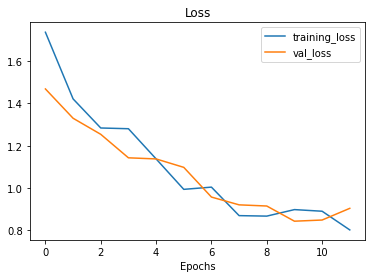

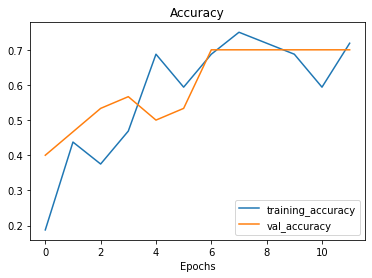

In [ ]:
plot_loss_curves(history_model_22)

In [ ]:
# Making predictions with our best model so far
y_probs = model_22.predict(test_data_4)

# View the first predcitons
y_probs[:5]

15/15 [==============================] - 3s 68ms/step


array([[0.55097055, 0.03605708, 0.29712778, 0.02749828, 0.08834627],
       [0.4206876 , 0.07160608, 0.35409632, 0.06055452, 0.09305552],
       [0.7787298 , 0.01910351, 0.07269541, 0.02782878, 0.10164251],
       [0.7753058 , 0.038885  , 0.03750704, 0.04856483, 0.09973735],
       [0.75114924, 0.0240957 , 0.07587419, 0.03467828, 0.11420252]],
      dtype=float32)

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0,
       0, 0, 4, 0, 3, 0, 0, 4])

In [ ]:
# unbatching test data batch to get y_labels
y_labels = []
for images, labels in test_data_4.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_labels,
                 y_pred=y_preds)

array([[7, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 9, 0],
       [7, 1, 0, 1, 2]])

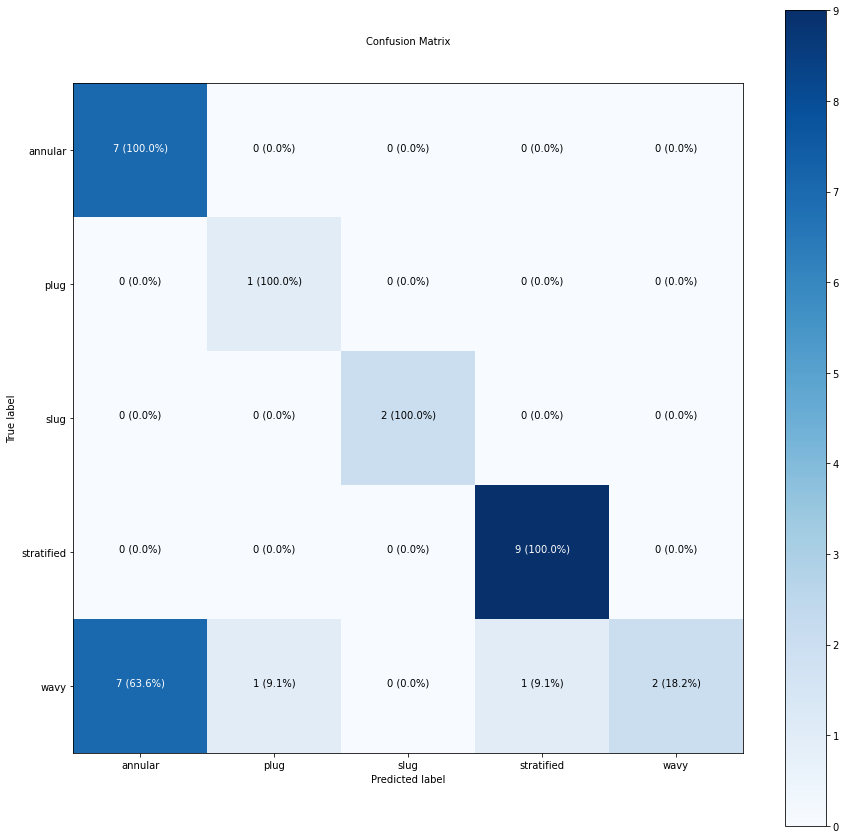

In [ ]:
# make a good confusion matrix
make_confusion_matrix(y_true=y_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
# Get all of the image file paths in the test dataset
filepaths = []
for filepath in test_data_4.list_files("/content/dataset_2/test/*/*.png",
                                      shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]


[b'/content/dataset_2/test/annular/17.png',
 b'/content/dataset_2/test/annular/20.png',
 b'/content/dataset_2/test/annular/21.png',
 b'/content/dataset_2/test/annular/22.png',
 b'/content/dataset_2/test/annular/51.png',
 b'/content/dataset_2/test/annular/56.png',
 b'/content/dataset_2/test/annular/7.png',
 b'/content/dataset_2/test/plug/29b.png',
 b'/content/dataset_2/test/slug/14.png',
 b'/content/dataset_2/test/slug/15.png']

In [ ]:
#Find out in our DataFrame which predictions are wrong
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'/content/dataset_2/test/annular/17.png',0,0,0.550971,annular,annular,True
1,b'/content/dataset_2/test/annular/20.png',0,0,0.420688,annular,annular,True
2,b'/content/dataset_2/test/annular/21.png',0,0,0.778730,annular,annular,True
3,b'/content/dataset_2/test/annular/22.png',0,0,0.775306,annular,annular,True
4,b'/content/dataset_2/test/annular/51.png',0,0,0.751149,annular,annular,True


In [ ]:
#Create a DataFrame of different parameters for each of the test images
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": y_preds,
                        "pred_conf": y_probs.max(axis=1), # get the maximum prediction probability value
                       " y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in y_preds]})
pred_df

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,b'/content/dataset_2/test/annular/17.png',0,0,0.550971,annular,annular
1,b'/content/dataset_2/test/annular/20.png',0,0,0.420688,annular,annular
2,b'/content/dataset_2/test/annular/21.png',0,0,0.778730,annular,annular
3,b'/content/dataset_2/test/annular/22.png',0,0,0.775306,annular,annular
4,b'/content/dataset_2/test/annular/51.png',0,0,0.751149,annular,annular
5,b'/content/dataset_2/test/annular/56.png',0,0,0.487887,annular,annular
6,b'/content/dataset_2/test/annular/7.png',0,0,0.477331,annular,annular
7,b'/content/dataset_2/test/plug/29b.png',1,1,0.810812,plug,plug
8,b'/content/dataset_2/test/slug/14.png',2,2,0.611295,slug,slug
9,b'/content/dataset_2/test/slug/15.png',2,2,0.449713,slug,slug


In [ ]:
#Find out in DataFrame which predictions are wrong
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'/content/dataset_2/test/annular/17.png',0,0,0.550971,annular,annular,True
1,b'/content/dataset_2/test/annular/20.png',0,0,0.420688,annular,annular,True
2,b'/content/dataset_2/test/annular/21.png',0,0,0.778730,annular,annular,True
3,b'/content/dataset_2/test/annular/22.png',0,0,0.775306,annular,annular,True
4,b'/content/dataset_2/test/annular/51.png',0,0,0.751149,annular,annular,True
5,b'/content/dataset_2/test/annular/56.png',0,0,0.487887,annular,annular,True
6,b'/content/dataset_2/test/annular/7.png',0,0,0.477331,annular,annular,True
7,b'/content/dataset_2/test/plug/29b.png',1,1,0.810812,plug,plug,True
8,b'/content/dataset_2/test/slug/14.png',2,2,0.611295,slug,slug,True
9,b'/content/dataset_2/test/slug/15.png',2,2,0.449713,slug,slug,True


In [ ]:
pred_df.to_csv("pred_df.csv", index=False)


In [ ]:
pred_df.to_excel("pred_df.xlsx", index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


# working with dataset_interfaces

In [ ]:
# Extacting data 
import numpy as np
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Multiphase_project/dataset_interfaces.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("dataset_interfaces"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'dataset_interfaces'.
There are 5 directories and 0 images in 'dataset_interfaces/test'.
There are 0 directories and 1 images in 'dataset_interfaces/test/plug'.
There are 0 directories and 2 images in 'dataset_interfaces/test/slug'.
There are 0 directories and 7 images in 'dataset_interfaces/test/annular'.
There are 0 directories and 11 images in 'dataset_interfaces/test/wavy'.
There are 0 directories and 10 images in 'dataset_interfaces/test/stratified'.
There are 5 directories and 0 images in 'dataset_interfaces/train'.
There are 0 directories and 5 images in 'dataset_interfaces/train/plug'.
There are 0 directories and 6 images in 'dataset_interfaces/train/slug'.
There are 0 directories and 7 images in 'dataset_interfaces/train/annular'.
There are 0 directories and 7 images in 'dataset_interfaces/train/wavy'.
There are 0 directories and 8 images in 'dataset_interfaces/train/stratified'.


In [ ]:
# Create training and test directory paths
train_dir_3 = "dataset_interfaces/train"
test_dir_3 = "dataset_interfaces/test"

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_5 = tf.keras.utils.image_dataset_from_directory(train_dir_3,
                                                         label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                         batch_size=2)
test_data_5 = tf.keras.utils.image_dataset_from_directory(test_dir_3,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        shuffle=False,
                                                        batch_size=2)

Found 33 files belonging to 5 classes.
Found 31 files belonging to 5 classes.


In [ ]:
# Setup the base model
base_model_23 = tf.keras.applications.EfficientNetB2(include_top=False)
base_model_23.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model_23(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_max_pool_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_23 = tf.keras.Model(inputs, outputs)

# Compile
model_23.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model_23 = model_23.fit(train_data_5,
                               epochs=100,
                               validation_data=test_data_5,
                               validation_steps=len(test_data_5),
                               callbacks=[early_stopping])

Epoch 1/100


17/17 [==============================] - 15s 233ms/step - loss: 1.7499 - accuracy: 0.1818 - val_loss: 1.6512 - val_accuracy: 0.3226
Epoch 2/100
17/17 [==============================] - 2s 106ms/step - loss: 1.4658 - accuracy: 0.3636 - val_loss: 1.4495 - val_accuracy: 0.5161
Epoch 3/100
17/17 [==============================] - 2s 107ms/step - loss: 1.3249 - accuracy: 0.5152 - val_loss: 1.4199 - val_accuracy: 0.5161
Epoch 4/100
17/17 [==============================] - 2s 105ms/step - loss: 1.2720 - accuracy: 0.5455 - val_loss: 1.3669 - val_accuracy: 0.4839
Epoch 5/100
17/17 [==============================] - 2s 103ms/step - loss: 1.0585 - accuracy: 0.5758 - val_loss: 1.2428 - val_accuracy: 0.5484
Epoch 6/100
17/17 [==============================] - 2s 104ms/step - loss: 1.1463 - accuracy: 0.5152 - val_loss: 1.2046 - val_accuracy: 0.5484
Epoch 7/100
17/17 [==============================] - 2s 105ms/step - loss: 1.0653 - accuracy: 0.6364 - val_loss: 1.2774 - val_accuracy: 0.5484
Epoch 8/10

In [ ]:
import pandas as pd
df = pd.read_excel("pred_df_mod.xlsx")
df

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct,water (kg/min),oil (kg /min),air (kg/min),PT131 [mbar],PDT120 [mbar],PDT121 [mbar]
0,b'/content/dataset_2/test/annular/17.png',0,0,0.550971,annular,annular,True,20,60,0.4,49.43530,23.16120,12.41920
1,b'/content/dataset_2/test/annular/20.png',0,0,0.420688,annular,annular,True,20,20,0.5,19.62260,9.87799,5.70991
2,b'/content/dataset_2/test/annular/21.png',0,0,0.778730,annular,annular,True,20,20,1.5,30.28990,11.68000,7.43477
3,b'/content/dataset_2/test/annular/22.png',0,0,0.775306,annular,annular,True,15,15,1.5,22.76580,9.45925,6.07616
4,b'/content/dataset_2/test/annular/51.png',0,0,0.751149,annular,annular,True,15,5,2.0,24.60420,10.22680,6.39396
5,b'/content/dataset_2/test/annular/56.png',0,0,0.487887,annular,annular,True,0,5,4.0,53.37110,21.03130,12.02970
6,b'/content/dataset_2/test/annular/7.png',0,0,0.477331,annular,annular,True,25,0,2.0,35.21786,16.21857,10.32126
7,b'/content/dataset_2/test/plug/29b.png',1,1,0.810812,plug,plug,True,0,25,0.1,7.34950,3.60246,2.53466
8,b'/content/dataset_2/test/slug/14.png',2,2,0.611295,slug,slug,True,40,40,0.1,21.07120,11.29780,6.84837
9,b'/content/dataset_2/test/slug/15.png',2,2,0.449713,slug,slug,True,60,20,0.1,21.10600,10.97790,6.67627


In [ ]:
df.isnull().sum()

img_path             0
y_true               0
y_pred               0
pred_conf            0
 y_true_classname    0
y_pred_classname     0
pred_correct         0
water (kg/min)       0
oil (kg /min)        0
air (kg/min)         0
PT131 [mbar]         0
PDT120 [mbar]        0
PDT121 [mbar]        0
dtype: int64

In [ ]:
df.describe()

,y_true,y_pred,pred_conf,water (kg/min),oil (kg /min),air (kg/min),PT131 [mbar],PDT120 [mbar],PDT121 [mbar]
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.533333,1.466667,0.592607,11.166667,13.466667,1.010000,19.531233,8.502484,5.218257
std,1.591645,1.525266,0.185475,13.370279,14.099971,1.122605,17.962405,8.021114,4.309386
min,0.000000,0.000000,0.278254,0.000000,0.000000,0.000000,3.517480,1.035290,1.031700
25%,1.250000,0.000000,0.427944,0.000000,1.250000,0.100000,5.575592,2.039487,1.767020
50%,3.000000,1.000000,0.598277,10.000000,15.000000,0.450000,9.699630,4.311625,3.023155
75%,4.000000,3.000000,0.769267,15.000000,20.000000,1.500000,28.439825,11.584450,7.288170
max,4.000000,4.000000,0.924525,60.000000,60.000000,4.000000,65.292800,28.963000,16.362700
